In [1]:
"""
import packages
"""
import os, glob
import pandas as pd
import numpy as np
import math, random
from datetime import datetime
import pickle
from matplotlib import pyplot as plt
import argparse
import path, sys, re, time
from collections import Counter
from scipy.spatial import distance_matrix
from scipy.signal import find_peaks

In [2]:
"""
import custom modules
"""
from module_.readText import read_adlmr
from module_.info.adlmr import adlmr_location
from module_.featureExtraction import feature_extraction
from module_.changePointDetection import change_point_detection
from module_.info.config import feature_name

In [3]:
# load dataset

f=open("./dataset/adlmr/annotated", 'rb')
text = f.readlines()
tasks = read_adlmr(text)

35


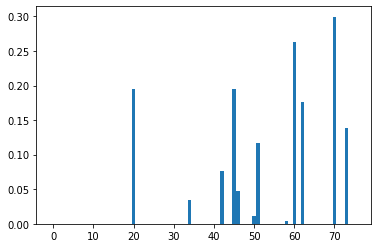

In [5]:
data_name='adlmr'
metric='SEP'

folder="./features/{}".format(data_name)
if not os.path.exists(folder):
    os.mkdir(folder)

# fig = plt.figure(constrained_layout=True, figsize=(15, 15))

sensor_set=set()
for _, v in tasks.items():
    for v_ in v:
        sensor_set = sensor_set | set(np.array(v_)[:,0])
sensor_list=sorted(sensor_set)
print(len(sensor_list))

for k, v in tasks.items():
    activityfolder="{}/{}".format(folder, k)
    if not os.path.exists(activityfolder):
        os.mkdir(activityfolder)
    for i, eps in enumerate(v):
        eps=np.array(eps)
        afolder="{}/{}".format(activityfolder, i)
        if not os.path.exists(afolder):
            os.mkdir(afolder)
        
        # sensor_list = sorted(set(eps[:, 0]))
        features = np.array(feature_extraction(eps, data_name, sensor_list))

        x_ = range(len(eps))

        scores = np.array(change_point_detection(features, data_name, metric))
        scores[scores<0]=0
        plt.bar(range(len(scores)), scores)

        break
    break